<a href="https://colab.research.google.com/github/Noccium/Perceptron/blob/main/perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import numpy as np
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
np.random.seed(42)

In [10]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
def getData():
  data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data.csv", names=["x1", "x2", "y"])
  return data
  

In [2]:
def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

The function should receive as inputs the data X, the labels y, the weights W (as an array), and the bias b, update the weights and bias W, b, according to the perceptron algorithm, and return W and b.

In [ ]:
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    for i in range(len(X)):
        y_hat = prediction(X[i],W,b)
        if y[i]-y_hat == 1:
            W[0] += X[i][0]*learn_rate
            W[1] += X[i][1]*learn_rate
            b += learn_rate
        elif y[i]-y_hat == -1:
            W[0] -= X[i][0]*learn_rate
            W[1] -= X[i][1]*learn_rate
            b -= learn_rate
    return W, b

This function runs the perceptron algorithm repeatedly on the dataset, and returns a few of the boundary lines obtained in the iterations, for plotting purposes.

In [3]:
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines

Distribuição dos dados

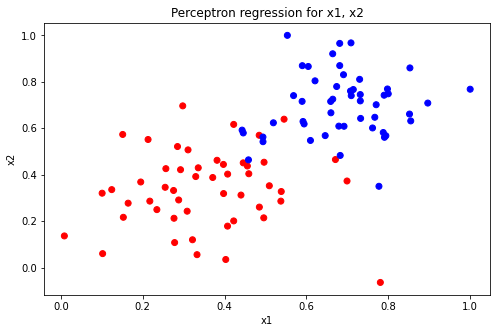

In [66]:
data = getData();
#X = data.iloc[:,[0,1]]
#y = data.iloc[:,[2]]
X = data.loc[:,["x1","x2"]]
y = data.loc[:, "y"]

x1 = X.iloc[:, 0]
x2 = X.iloc[:, 1]

color = ['red' if value == 1 else 'blue' for value in y]
plt.figure(figsize=(8,5))
plt.scatter(x1, x2, marker='o', color=color)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Perceptron regression for x1, x2')
plt.show()

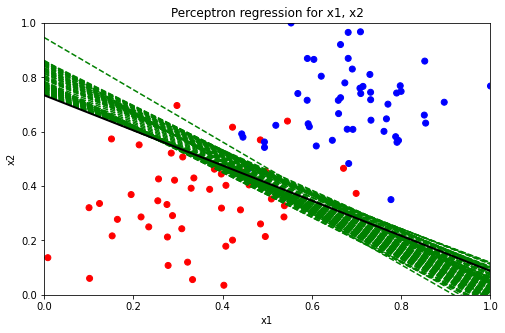

In [85]:
boundary_lines = trainPerceptronAlgorithm(X.to_numpy(), y.to_numpy(), learn_rate=0.01, num_epochs=100)
x_lin = np.linspace(0, 1, 100)

fig, ax = plt.subplots(1, 1, figsize=(8,5))
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.scatter(x1, x2, marker='o', color=color)
for i, line in enumerate(boundary_lines):
    Θo, Θ1  = line
    if i == len(boundary_lines) - 1:
        c, ls, lw = 'k', '-', 2
    else:
        c, ls, lw = 'g', '--', 1.5
    ax.plot(x_lin, Θo * x_lin + Θ1, c=c, ls=ls, lw=lw)

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Perceptron regression for x1, x2')
plt.show()
